### Business problem

#### Most American institutions (that are not necessarily the top 10-20) that provide undergraduate education face a challenge i.e. what kind of students they will make an offer for admission so that they can maintain a good performance in terms of number of students completing their courses in time. They also need to predict how the current batch of intake will perform. The universities cannot relax the entry criteria too much as that way the quality of education that they provide gets diluted. At the other hand, they have to make offers to the candidates who are not only having appropriate profile but are also most likely to accept the offers.

#### On the other side, the students have a challenge deciding which colleges they should apply i.e. the colleges that provide best performance at a minimal cost given their own profiles. The student profile is determined by not only the performance in examination such as SAT and ACT, but also other data points such as their ethnicity, immigration status, gender etc.

###### We will be interested in answering three main questions for an institute i.e.
(a) What will be a likely enrollment rate?
(b) What will be a likely graduation rate?
(c) Which are the most lucrative colleges for students in terms of pass rate and cost?

##### Do universities with a high number of applications are the preferred ones by students? in other words, could the number of applications tell us that a university is one of the most preferred by students?
#### Do students prefer universities that have a high rate of admission? in other words, do students prefer a university where it is easier for them to be admitted?
###### Do students prefer public or private universities?
##### Do students prefer universities with low tuition and fees?
##### Do students prefer a university for its low on-campus cost of living?
##### Do students prefer universities from highly populated states?
##### Do students prefer a university because it belongs to a state with a high GDP per capita?
##### Do students prefer a university based on the possibility of a higher, additional academic degree in the same university?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('universities_data.csv')

In [3]:
population = pd.read_csv('states_population.csv')

In [4]:
gdp = pd.read_csv('states_gdp.csv')

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 145 columns):
 #    Column                                                                                  Non-Null Count  Dtype  
---   ------                                                                                  --------------  -----  
 0    ID number                                                                               1534 non-null   int64  
 1    Name                                                                                    1534 non-null   object 
 2    year                                                                                    1534 non-null   int64  
 3    ZIP code                                                                                1534 non-null   object 
 4    Highest degree offered                                                                  1534 non-null   object 
 5    County name                                                 

In [7]:
data.head()

,ID number,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,Offers One but less than two years certificate,Offers Associate's degree,Offers Two but less than 4 years certificate,Offers Bachelor's degree,Offers Postbaccalaureate certificate,Offers Master's degree,Offers Post-master's certificate,Offers Doctor's degree - research/scholarship,Offers Doctor's degree - professional practice,Offers Doctor's degree - other,Offers Other degree,Applicants total,Admissions total,Enrolled total,Percent of freshmen submitting SAT scores,Percent of freshmen submitting ACT scores,SAT Critical Reading 25th percentile score,SAT Critical Reading 75th percentile score,SAT Math 25th percentile score,SAT Math 75th percentile score,SAT Writing 25th percentile score,SAT Writing 75th percentile score,ACT Composite 25th percentile score,ACT Composite 75th percentile score,"Estimated enrollment, total","Estimated enrollment, full time","Estimated enrollment, part time","Estimated undergraduate enrollment, total","Estimated undergraduate enrollment, full time","Estimated undergraduate enrollment, part time","Estimated freshman undergraduate enrollment, total","Estimated freshman enrollment, full time","Estimated freshman enrollment, part time","Estimated graduate enrollment, total","Estimated graduate enrollment, full time","Estimated graduate enrollment, part time",Associate's degrees awarded,Bachelor's degrees awarded,Master's degrees awarded,Doctor's degrese - research/scholarship awarded,Doctor's degrees - professional practice awarded,Doctor's degrees - other awarded,Certificates of less than 1-year awarded,Certificates of 1 but less than 2-years awarded,Certificates of 2 but less than 4-years awarded,Postbaccalaureate certificates awarded,Post-master's certificates awarded,Number of students receiving an Associate's degree,Number of students receiving a Bachelor's degree,Number of students receiving a Master's degree,Number of students receiving a Doctor's degree,Number of students receiving a certificate of less than 1-year,Number of students receiving a certificate of 1 but less than 4-years,Number of students receiving a Postbaccalaureate or Post-master's certificate,Percent admitted - total,Admissions yield - total,"Tuition and fees, 2010-11","Tuition and fees, 2011-12","Tuition and fees, 2012-13","Tuition and fees, 2013-14",Total price for in-state students living on campus 2013-14,Total price for out-of-state students living on campus 2013-14,State abbreviation,FIPS state code,Geographic region,Sector of institution,Level of institution,Control of institution,Historically Black College or University,Tribal college,Degree of urbanization (Urban-centric locale),Carnegie Classification 2010: Basic,Total enrollment,Full-time enrollment,Part-time enrollment,Undergraduate enrollment,Graduate enrollment,Full-time undergraduate enrollment,Part-time undergraduate enrollment,Percent of total enrollment that are American Indian or Alaska Native,Percent of total enrollment that are Asian,Percent of total enrollment that are Black or African American,Percent of total enrollment that are Hispanic/Latino,Percent of total enrollment that are Native Hawaiian or Other Pacific Islander,Percent of total enrollment that are White,Percent of total enrollment that are two or more races,Percent of total enrollment that are Race/ethnicity unknown,Percent of total enrollment that are Nonresident Alien,Percent of total enrollment that are Asian/Native Hawaiian/Pacific Islander,Percent of total enrollment that are women,Percent of undergraduate enrollment that are American Indian or Alaska Native,Percent of undergraduate enrollment that are Asian,Percent of undergraduate enrollment that are Black or African American,Percent of undergraduate enrollment that are Hispanic/Latino,Percent of undergraduate enrollment that are Native Hawaiian or

In [8]:
data = data.set_index('ID number')

In [9]:
avg_null_columns = 0.6*(len(data.columns))
avg_null_rows = 0.6*(len(data.index))

In [10]:
# Removing rows having null value more that 60% of all data.

d = {}
for i in data.index:
    d[i] = data[data.index== i].isna().sum().sum()

for key in d.keys():
    if d[key]>avg_null_columns:
        data.drop(key, axis = 0, inplace = True)
        print('Row index {} with {} null values has been removed'.format(key,d[key]))

Row index 140669 with 127 null values has been removed
Row index 228714 with 127 null values has been removed


In [11]:
# Removing colums having null value more that 60% of all data.
d = {}
for i in data.columns:
    d[i] = data[i].isna().sum()

for key in d.keys():
    if d[key]>avg_null_rows:
        data.drop(key, axis = 1, inplace = True)
        print('Column {} with {} null values has been removed'.format(key,d[key]))

Column Endowment assets (year end) per FTE enrollment (GASB) with 1016 null values has been removed


In [12]:
data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 100654 to 456490
Data columns (total 143 columns):
 #    Column                                                                                  Non-Null Count  Dtype  
---   ------                                                                                  --------------  -----  
 0    Name                                                                                    1532 non-null   object 
 1    year                                                                                    1532 non-null   int64  
 2    ZIP code                                                                                1532 non-null   object 
 3    Highest degree offered                                                                  1532 non-null   object 
 4    County name                                                                             1532 non-null   object 
 5    Longitude location of institution                    

In [13]:
l = ['Total enrollment'
     ,'Full-time enrollment'
     ,'Part-time enrollment'
     ,'Undergraduate enrollment'
     ,'Graduate enrollment'
     ,'Full-time undergraduate enrollment'
     ,'Part-time undergraduate enrollment'   
     ,'''Associate's degrees awarded'''    
     ,'''Bachelor's degrees awarded'''                                          
     ,'''Master's degrees awarded'''                                            
     ,'''Doctor's degrese - research/scholarship awarded'''                      
     ,'''Doctor's degrees - professional practice awarded'''                     
     ,'''Doctor's degrees - other awarded'''                                     
     ,'Certificates of less than 1-year awarded'                             
     ,'Certificates of 1 but less than 2-years awarded'                      
     ,'Certificates of 2 but less than 4-years awarded'                      
     ,'Postbaccalaureate certificates awarded'                               
     ,'''Post-master's certificates awarded'''                                   
     ,'''Number of students receiving an Associate's degree'''                   
     ,'''Number of students receiving a Bachelor's degree'''                     
     ,'''Number of students receiving a Master's degree'''                       
     ,'''Number of students receiving a Doctor's degree'''                       
     ,'Number of students receiving a certificate of less than 1-year'       
     ,'Number of students receiving a certificate of 1 but less than 4-years'
     ,'''Number of students receiving a Postbaccalaureate or Post-master's certificate''' ]
     
for column in l:
    data[column] = data[column].astype(int)
    print('{} : {}'.format(column,data[column].dtype))


Total enrollment : int32
Full-time enrollment : int32
Part-time enrollment : int32
Undergraduate enrollment : int32
Graduate enrollment : int32
Full-time undergraduate enrollment : int32
Part-time undergraduate enrollment : int32
Associate's degrees awarded : int32
Bachelor's degrees awarded : int32
Master's degrees awarded : int32
Doctor's degrese - research/scholarship awarded : int32
Doctor's degrees - professional practice awarded : int32
Doctor's degrees - other awarded : int32
Certificates of less than 1-year awarded : int32
Certificates of 1 but less than 2-years awarded : int32
Certificates of 2 but less than 4-years awarded : int32
Postbaccalaureate certificates awarded : int32
Post-master's certificates awarded : int32
Number of students receiving an Associate's degree : int32
Number of students receiving a Bachelor's degree : int32
Number of students receiving a Master's degree : int32
Number of students receiving a Doctor's degree : int32
Number of students receiving a cert

In [14]:
l = [
    'Applicants total',                                
'Admissions total',                                   
'Enrolled total',                                     
'SAT Critical Reading 25th percentile score',         
'SAT Critical Reading 75th percentile score',        
'SAT Math 25th percentile score', 
'SAT Math 75th percentile score',
'SAT Writing 25th percentile score',                  
'SAT Writing 75th percentile score',                  
'ACT Composite 25th percentile score',                
'ACT Composite 75th percentile score',                
'Estimated enrollment, total',                        
'Estimated enrollment, full time',                     
'Estimated enrollment, part time',                    
'Estimated undergraduate enrollment, total',           
'Estimated undergraduate enrollment, full time',      
'Estimated undergraduate enrollment, part time',      
'Estimated freshman undergraduate enrollment, total', 
'Estimated freshman enrollment, full time',          
'Estimated freshman enrollment, part time',          
'Estimated graduate enrollment, total',              
'Estimated graduate enrollment, full time',             
'Estimated graduate enrollment, part time',             
]
    
for column in l:
    data[column].replace(np.nan, 0, inplace = True)
    data[column] = data[column].astype(int)

In [15]:
l = [
'Percent admitted - total',                                                                
'Admissions yield - total',                                                          
'Tuition and fees, 2010-11',                                                               
'Tuition and fees, 2011-12',                                                               
'Tuition and fees, 2012-13',                                                               
'Tuition and fees, 2013-14',                                                         
'Total price for in-state students living on campus 2013-14',                              
'Total price for out-of-state students living on campus 2013-14',                    
'Percent of first-time undergraduates - in-state',                                         
'Percent of first-time undergraduates - out-of-state',                                     
'Number of first-time undergraduates - foreign countries',                                 
'Percent of first-time undergraduates - foreign countries',                                
'Number of first-time undergraduates - residence unknown',                                 
'Percent of first-time undergraduates - residence unknown',                                
'Percent of freshmen receiving any financial aid',                                   
'Percent of freshmen receiving federal, state, local or institutional grant aid',          
'Percent of freshmen receiving federal grant aid',                                         
'Percent of freshmen receiving Pell grants',                                               
'Percent of freshmen receiving other federal grant aid',                                   
'Percent of freshmen receiving state/local grant aid',                                     
'Percent of freshmen receiving institutional grant aid',
'Percent of freshmen receiving student loan aid',
'Percent of freshmen receiving federal student loans',                                     
'Percent of freshmen receiving other loan aid',
]

for i in l:
    mean_of_l = round(data[i].mean(),1)
    data[i].replace(np.nan, mean_of_l, inplace = True)


In [16]:
round(data['Admissions yield - total'].mean(),1)

33.1

In [17]:
l = [
'Percent of undergraduate enrollment that are American Indian or Alaska Native'         
,'Percent of undergraduate enrollment that are Asian'                                    
,'Percent of undergraduate enrollment that are Black or African American'                
,'Percent of undergraduate enrollment that are Hispanic/Latino'                          
,'Percent of undergraduate enrollment that are Native Hawaiian or Other Pacific Islander'
,'Percent of undergraduate enrollment that are White'                                    
,'Percent of undergraduate enrollment that are two or more races'                        
,'Percent of undergraduate enrollment that are Race/ethnicity unknown'                   
,'Percent of undergraduate enrollment that are Nonresident Alien'                        
,'Percent of undergraduate enrollment that are Asian/Native Hawaiian/Pacific Islander'   
,'Percent of undergraduate enrollment that are women'                                    
,'Percent of graduate enrollment that are American Indian or Alaska Native'              
,'Percent of graduate enrollment that are Asian'                                         
,'Percent of graduate enrollment that are Black or African American'                     
,'Percent of graduate enrollment that are Hispanic/Latino'                               
,'Percent of graduate enrollment that are Native Hawaiian or Other Pacific Islander'     
,'Percent of graduate enrollment that are White'                                         
,'Percent of graduate enrollment that are two or more races'                             
,'Percent of graduate enrollment that are Race/ethnicity unknown'                        
,'Percent of graduate enrollment that are Nonresident Alien'                             
,'Percent of graduate enrollment that are Asian/Native Hawaiian/Pacific Islander'        
,'Percent of graduate enrollment that are women' 
]

for i in l:
    mode_of_l = data[i].mode()    
    data[i].replace(np.nan, mode_of_l[0], inplace = True)


In [18]:
l = [
'Percent of freshmen submitting SAT scores',                                               
'Percent of freshmen submitting ACT scores',                                               
'Graduation rate - Bachelor degree within 4 years, total',                                 
'Graduation rate - Bachelor degree within 5 years, total',                                 
'Endowment assets (year end) per FTE enrollment (FASB)',                                   
'Graduation rate - Bachelor degree within 6 years, total'                       
]

for i in l:
    data[i].replace(np.nan, 0, inplace = True)

In [19]:
data['Number of first-time undergraduates - in-state'].replace(np.nan, data['Number of first-time undergraduates - in-state'].mean(), inplace = True)

In [20]:
data['Number of first-time undergraduates - in-state'].astype(int)

ID number
100654     896
100663    1529
100690     896
100706     514
100724     903
          ... 
451671      78
454184     896
454582     896
455770     896
456490     896
Name: Number of first-time undergraduates - in-state, Length: 1532, dtype: int32

In [21]:
data['Number of first-time undergraduates - out-of-state'].replace(np.nan, data['Number of first-time undergraduates - out-of-state'].mean(), inplace = True)
data['Number of first-time undergraduates - out-of-state'].astype(int)

ID number
100654    292
100663    224
100690    292
100706     92
100724    571
         ... 
451671      2
454184    292
454582    292
455770    292
456490    292
Name: Number of first-time undergraduates - out-of-state, Length: 1532, dtype: int32

In [22]:
data.isna().sum().sum()

0

In [23]:
data.duplicated().sum()

0

In [55]:
data.head(80)

,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,Offers One but less than two years certificate,Offers Associate's degree,Offers Two but less than 4 years certificate,Offers Bachelor's degree,Offers Postbaccalaureate certificate,Offers Master's degree,Offers Post-master's certificate,Offers Doctor's degree - research/scholarship,Offers Doctor's degree - professional practice,Offers Doctor's degree - other,Offers Other degree,Applicants total,Admissions total,Enrolled total,Percent of freshmen submitting SAT scores,Percent of freshmen submitting ACT scores,SAT Critical Reading 25th percentile score,SAT Critical Reading 75th percentile score,SAT Math 25th percentile score,SAT Math 75th percentile score,SAT Writing 25th percentile score,SAT Writing 75th percentile score,ACT Composite 25th percentile score,ACT Composite 75th percentile score,"Estimated enrollment, total","Estimated enrollment, full time","Estimated enrollment, part time","Estimated undergraduate enrollment, total","Estimated undergraduate enrollment, full time","Estimated undergraduate enrollment, part time","Estimated freshman undergraduate enrollment, total","Estimated freshman enrollment, full time","Estimated freshman enrollment, part time","Estimated graduate enrollment, total","Estimated graduate enrollment, full time","Estimated graduate enrollment, part time",Associate's degrees awarded,Bachelor's degrees awarded,Master's degrees awarded,Doctor's degrese - research/scholarship awarded,Doctor's degrees - professional practice awarded,Doctor's degrees - other awarded,Certificates of less than 1-year awarded,Certificates of 1 but less than 2-years awarded,Certificates of 2 but less than 4-years awarded,Postbaccalaureate certificates awarded,Post-master's certificates awarded,Number of students receiving an Associate's degree,Number of students receiving a Bachelor's degree,Number of students receiving a Master's degree,Number of students receiving a Doctor's degree,Number of students receiving a certificate of less than 1-year,Number of students receiving a certificate of 1 but less than 4-years,Number of students receiving a Postbaccalaureate or Post-master's certificate,Percent admitted - total,Admissions yield - total,"Tuition and fees, 2010-11","Tuition and fees, 2011-12","Tuition and fees, 2012-13","Tuition and fees, 2013-14",Total price for in-state students living on campus 2013-14,Total price for out-of-state students living on campus 2013-14,State abbreviation,FIPS state code,Geographic region,Sector of institution,Level of institution,Control of institution,Historically Black College or University,Tribal college,Degree of urbanization (Urban-centric locale),Carnegie Classification 2010: Basic,Total enrollment,Full-time enrollment,Part-time enrollment,Undergraduate enrollment,Graduate enrollment,Full-time undergraduate enrollment,Part-time undergraduate enrollment,Percent of total enrollment that are American Indian or Alaska Native,Percent of total enrollment that are Asian,Percent of total enrollment that are Black or African American,Percent of total enrollment that are Hispanic/Latino,Percent of total enrollment that are Native Hawaiian or Other Pacific Islander,Percent of total enrollment that are White,Percent of total enrollment that are two or more races,Percent of total enrollment that are Race/ethnicity unknown,Percent of total enrollment that are Nonresident Alien,Percent of total enrollment that are Asian/Native Hawaiian/Pacific Islander,Percent of total enrollment that are women,Percent of undergraduate enrollment that are American Indian or Alaska Native,Percent of undergraduate enrollment that are Asian,Percent of undergraduate enrollment that are Black or African American,Percent of undergraduate enrollment that are Hispanic/Latino,Percent of undergraduate enrollment that are Native Hawaiian or Other Pac

6142.5

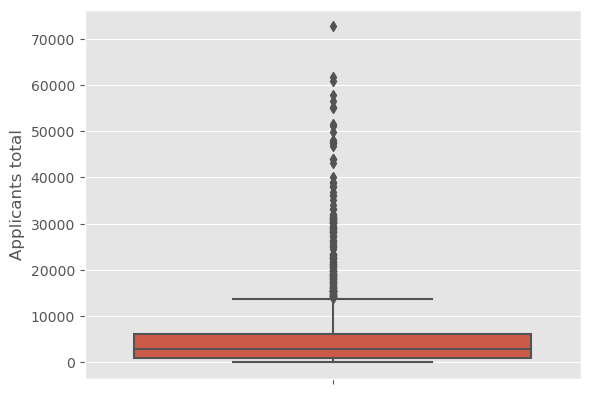

In [44]:
# determining the higher values of total  
sns.boxplot(y = data['Applicants total'])
q3 = np.percentile(data['Applicants total'], 75)
q3

In [41]:
higher_no_of_applicant = data[data['Applicants total']>q3]

<AxesSubplot:xlabel='Applicants total', ylabel='Enrolled total'>

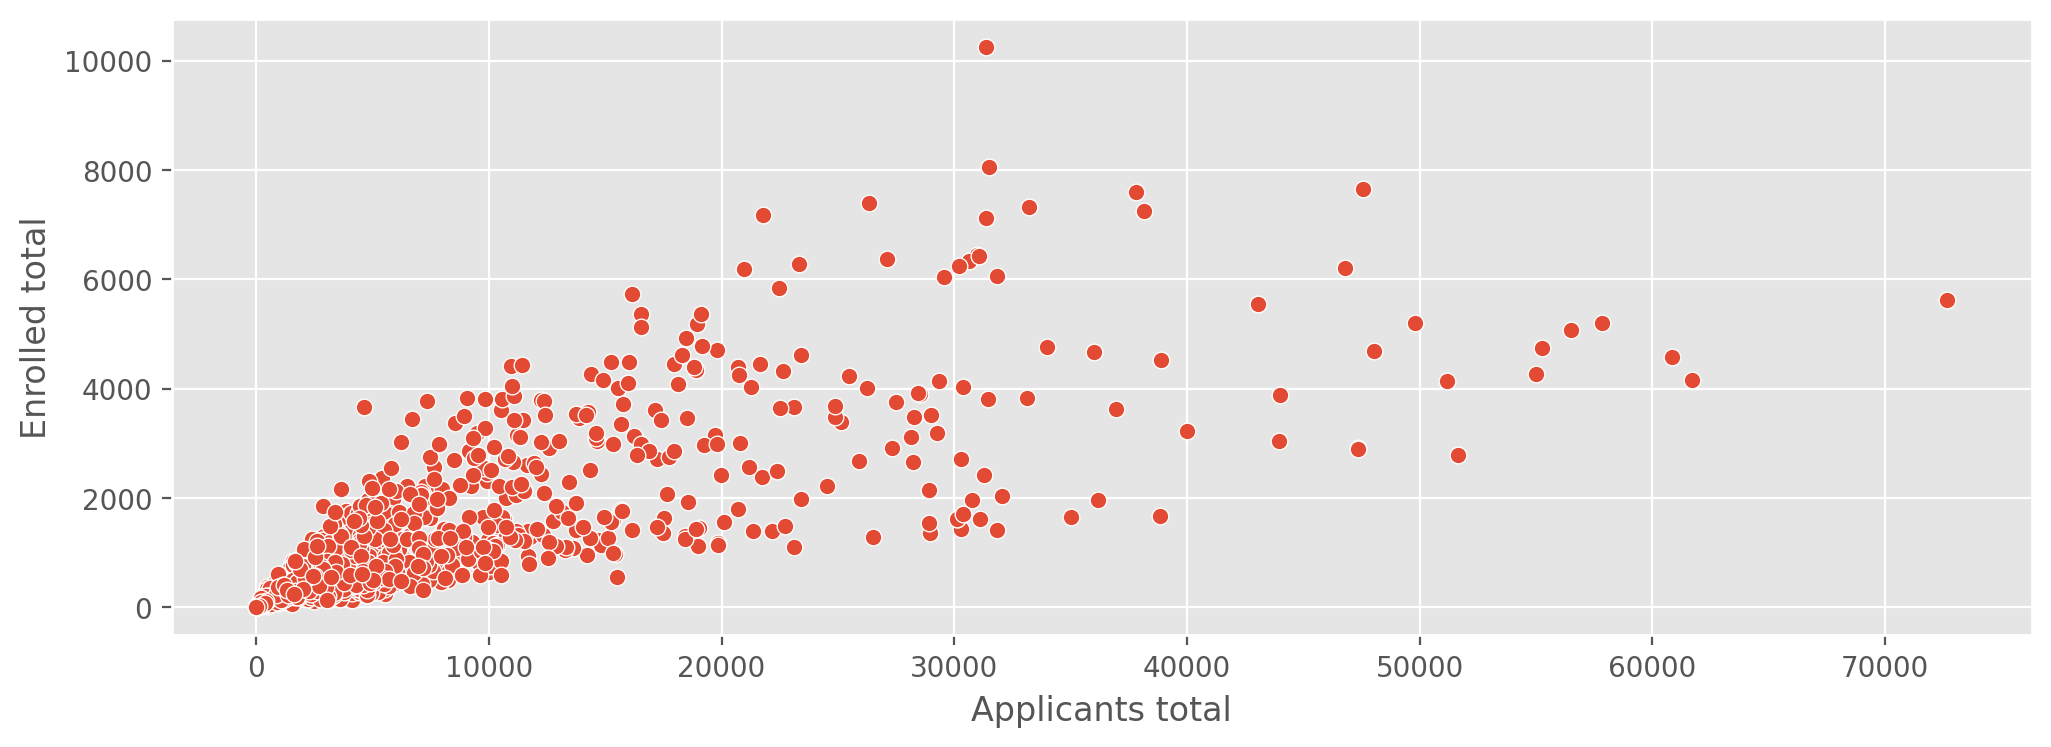

In [42]:
plt.figure(figsize = (12,4) ,dpi = 200)
sns.scatterplot('Applicants total','Enrolled total', data = data)

<AxesSubplot:xlabel='Applicants total', ylabel='Enrolled total'>

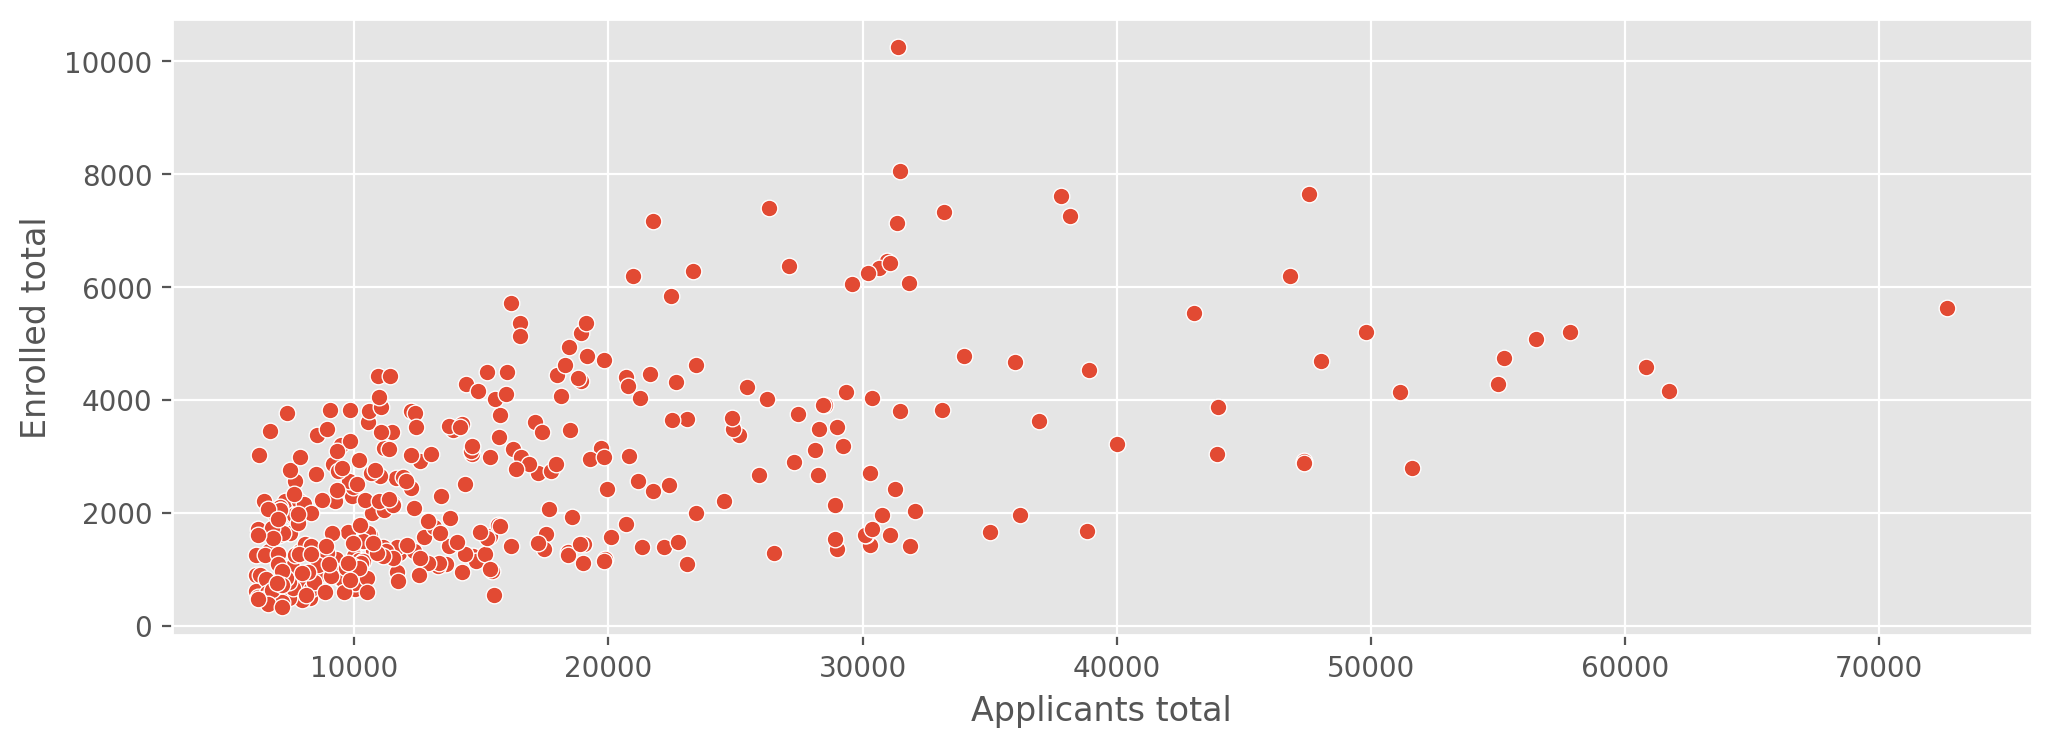

In [43]:
plt.figure(figsize = (12,4) ,dpi = 200)
sns.scatterplot('Applicants total','Enrolled total', data = higher_no_of_applicant)

##### Do universities with a high number of applications are the preferred ones by students? in other words, could the number of applications tell us that a university is one of the most preferred by students?

No, high number of applications does not determine that the university is most preferred by students.
(universities with higher applications number, enrollment rate of students is almost steady)

3812.0

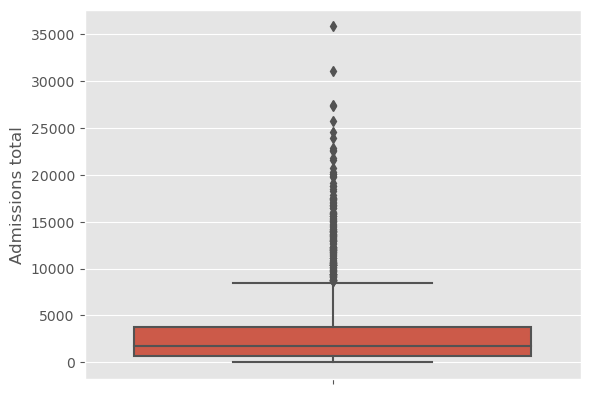

In [34]:
# determining universities with higher addmision rate   
sns.boxplot(y = data['Admissions total'])
q3 = np.percentile(data['Admissions total'], 75)
q3

<AxesSubplot:xlabel='Admissions total', ylabel='Enrolled total'>

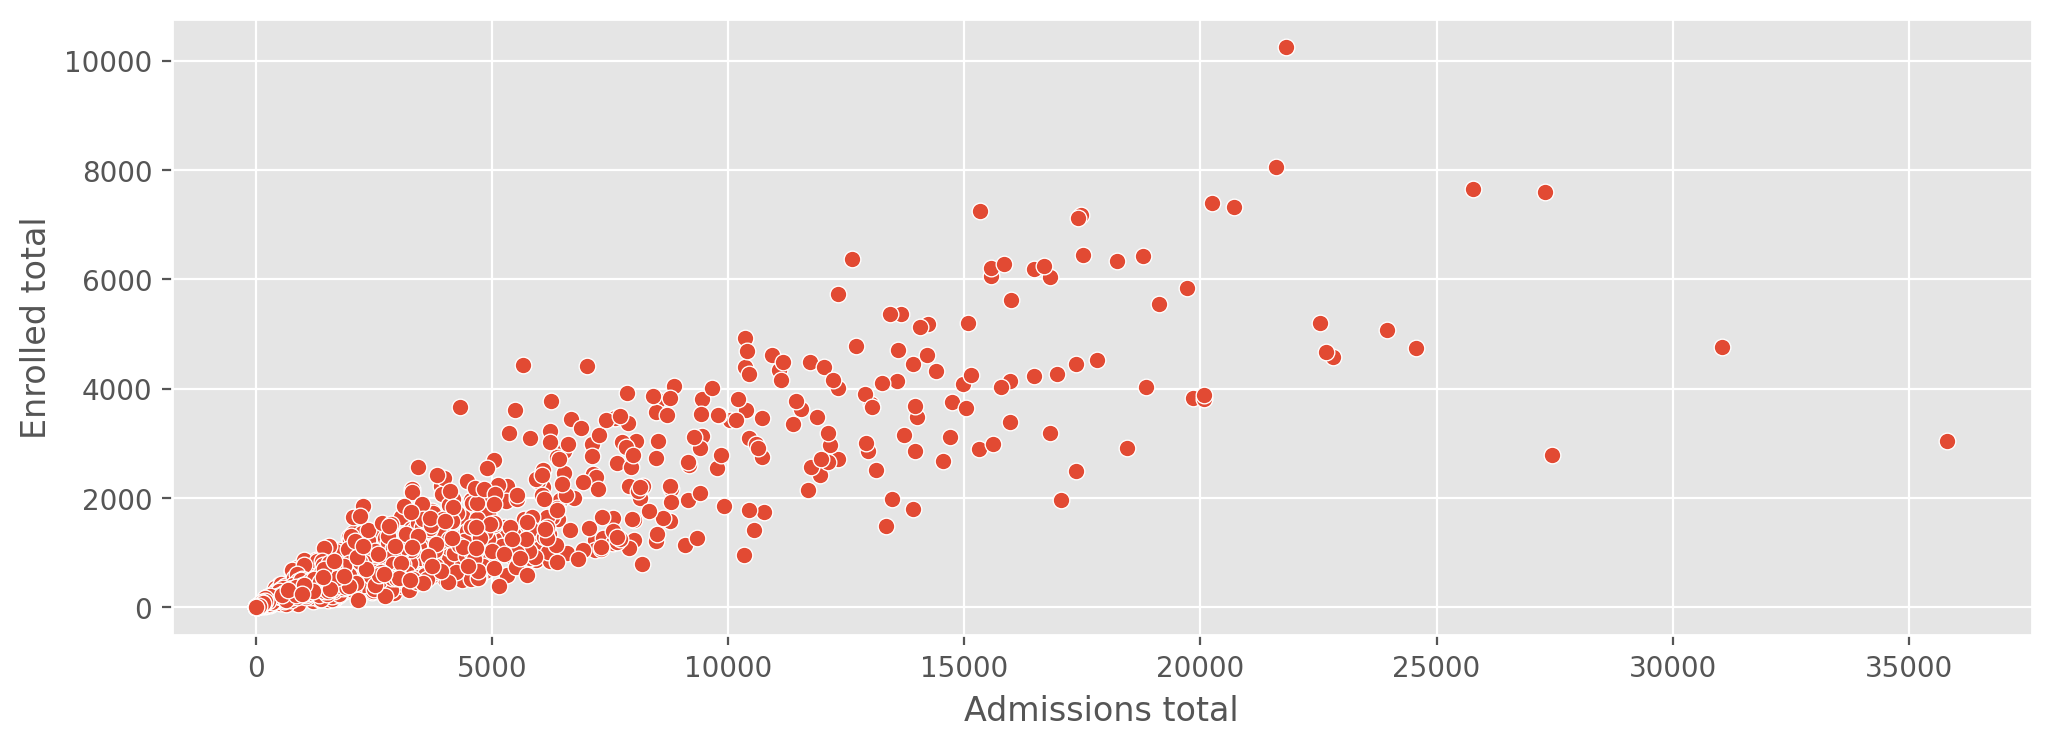

In [36]:
plt.figure(figsize = (12,4) ,dpi = 200)
sns.scatterplot('Admissions total','Enrolled total', data = data)

In [38]:
higher_rate_of_addmission = data[data['Admissions total']>q3]

<AxesSubplot:xlabel='Applicants total', ylabel='Enrolled total'>

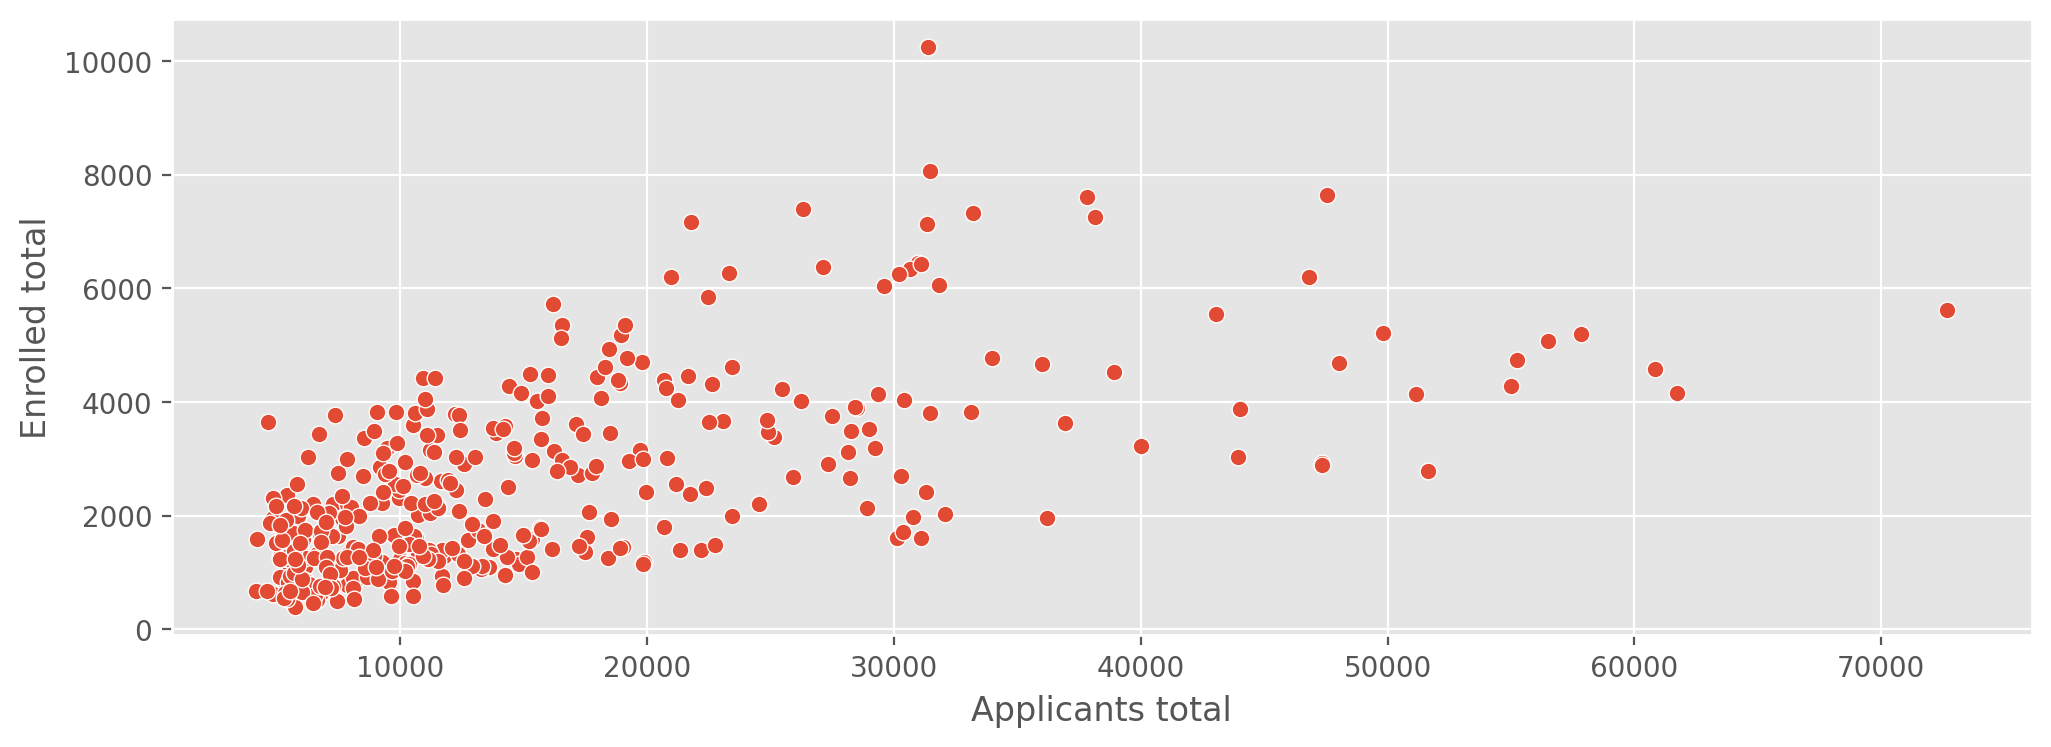

In [39]:
plt.figure(figsize = (12,4) ,dpi = 200)
sns.scatterplot('Applicants total','Enrolled total', data = higher_rate_of_addmission)

#### Do students prefer universities that have a high rate of admission? in other words, do students prefer a university where it is easier for them to be admitted?


Yes, universities that have a high rate of admission student enrollment rate is high.

<AxesSubplot:xlabel='Control of institution', ylabel='Enrolled total'>

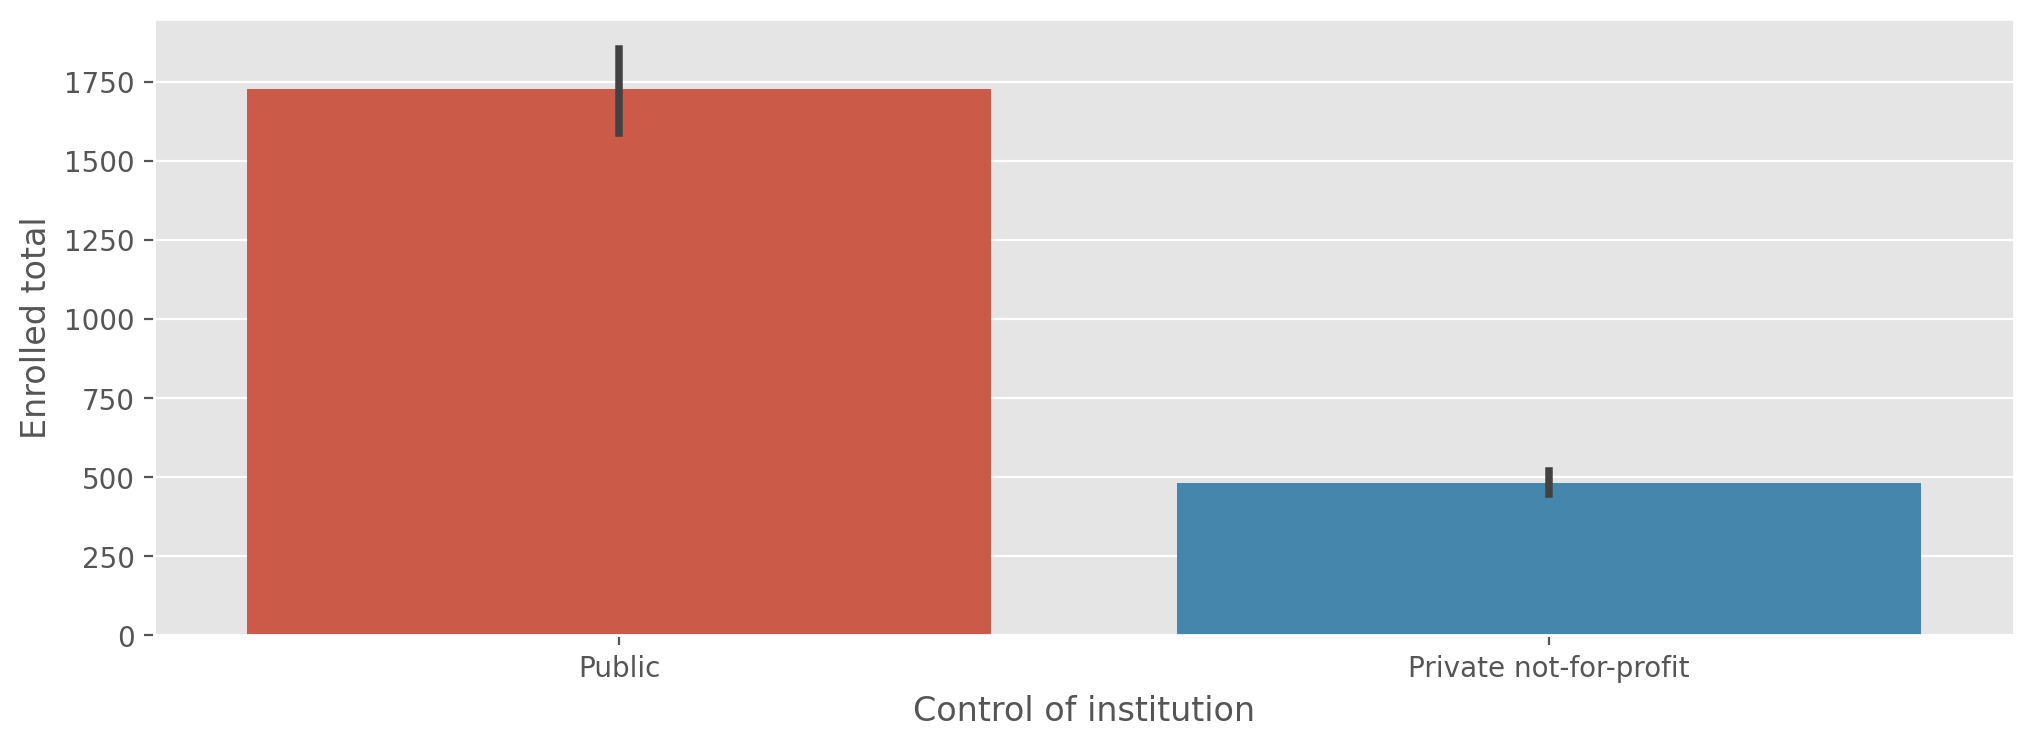

In [45]:
plt.figure(figsize = (12,4) ,dpi = 200)
sns.barplot('Control of institution','Enrolled total', data = data)

###### Do students prefer public or private universities?

Students prefer public universities as compared to private

<AxesSubplot:xlabel='Tuition and fees, 2010-11', ylabel='Enrolled total'>

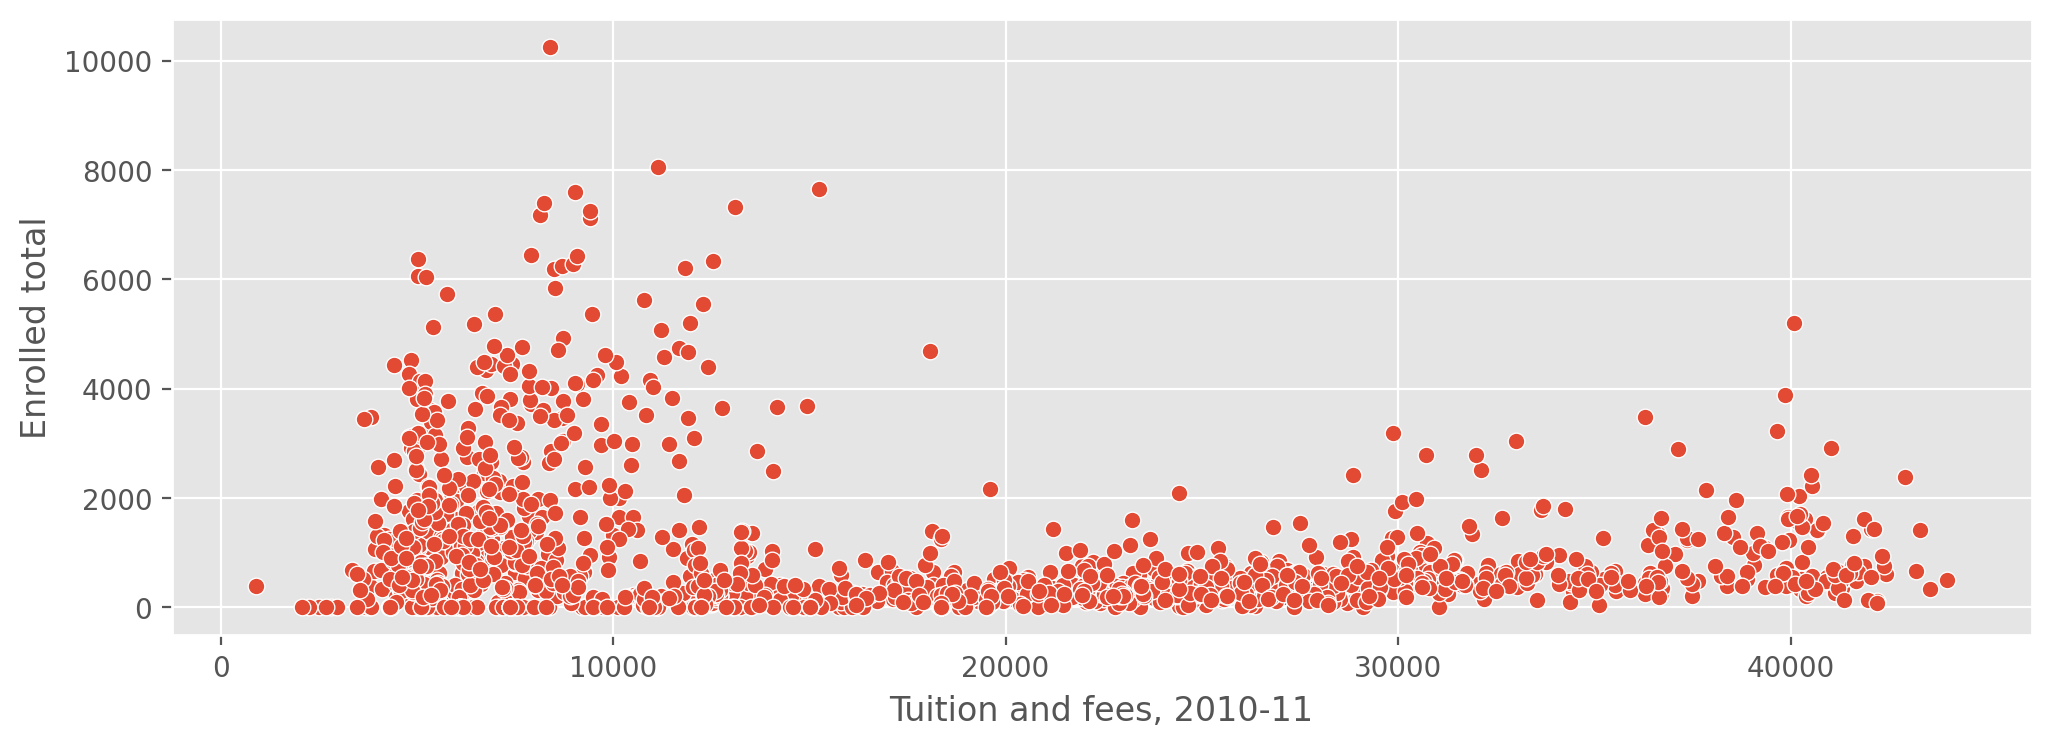

In [49]:
plt.figure(figsize = (12,4) ,dpi = 200)
sns.scatterplot('Tuition and fees, 2010-11','Enrolled total', data = data)

<AxesSubplot:xlabel='Tuition and fees, 2011-12', ylabel='Enrolled total'>

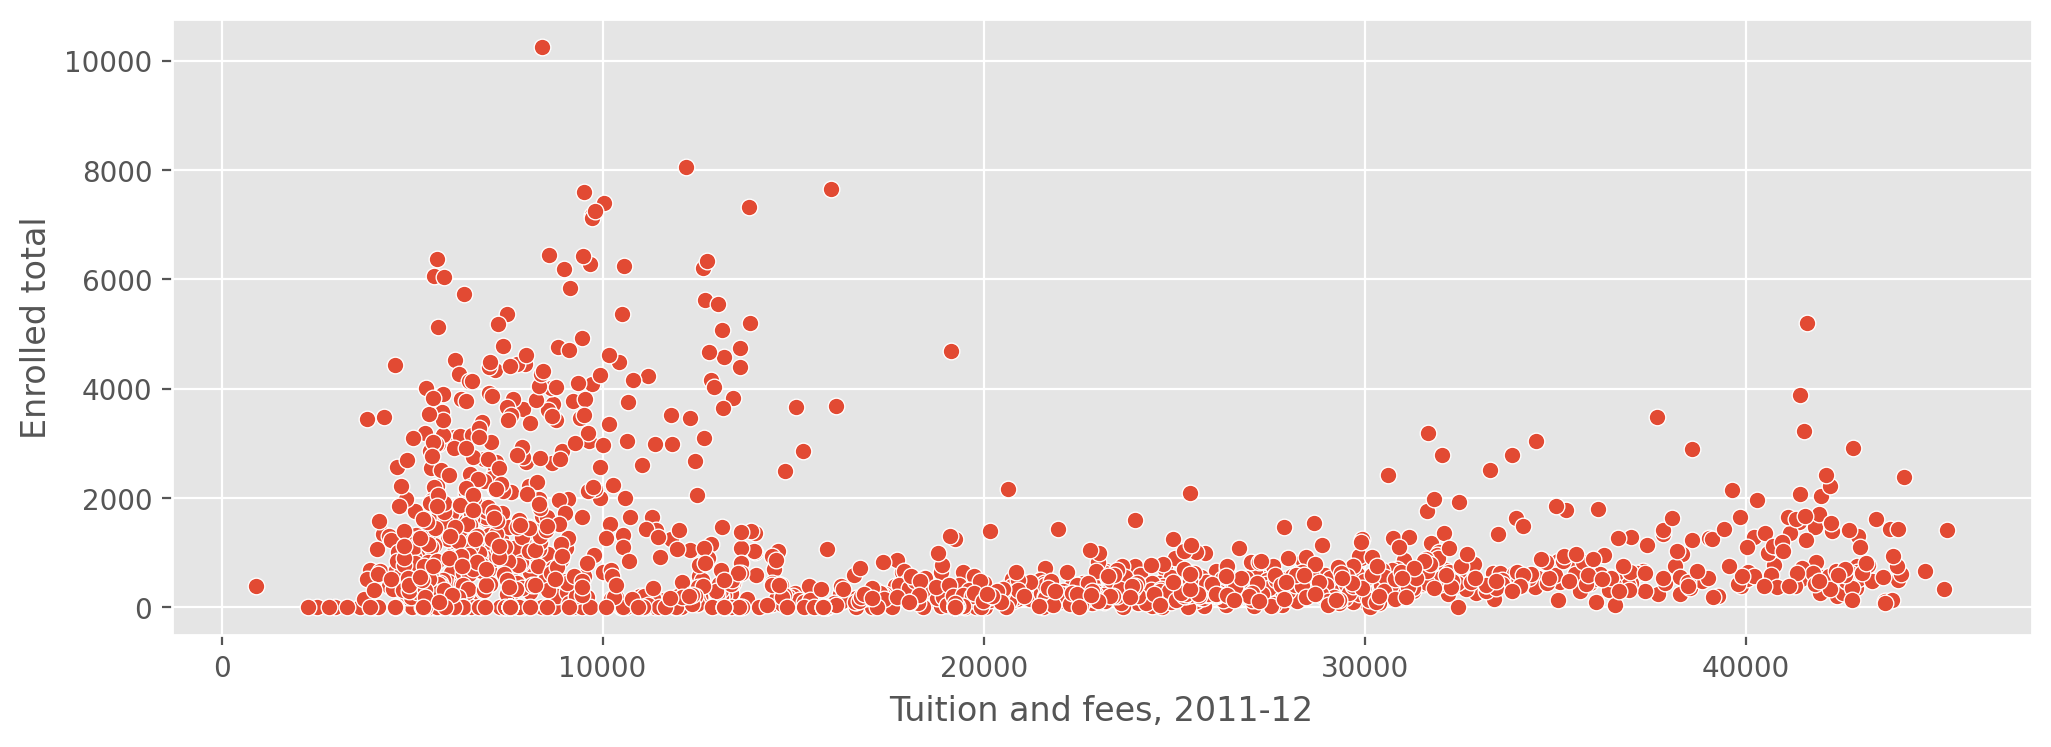

In [50]:
plt.figure(figsize = (12,4) ,dpi = 200)
sns.scatterplot('Tuition and fees, 2011-12','Enrolled total', data = data)

<AxesSubplot:xlabel='Tuition and fees, 2012-13', ylabel='Enrolled total'>

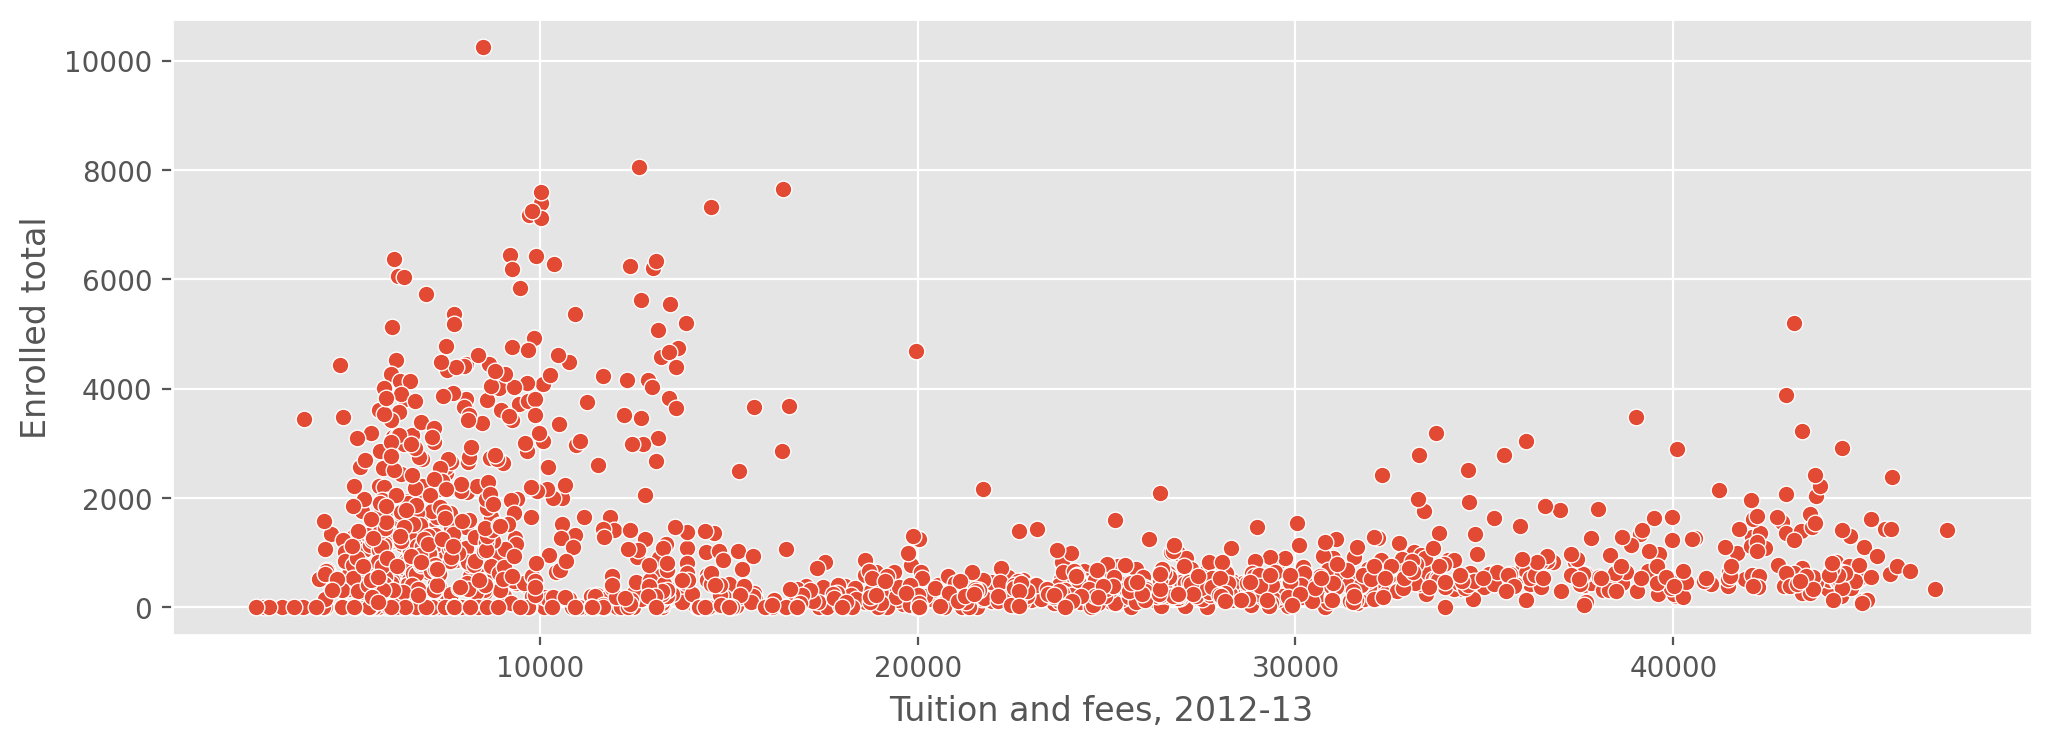

In [51]:
plt.figure(figsize = (12,4) ,dpi = 200)
sns.scatterplot('Tuition and fees, 2012-13','Enrolled total', data = data)

<AxesSubplot:xlabel='Tuition and fees, 2013-14', ylabel='Enrolled total'>

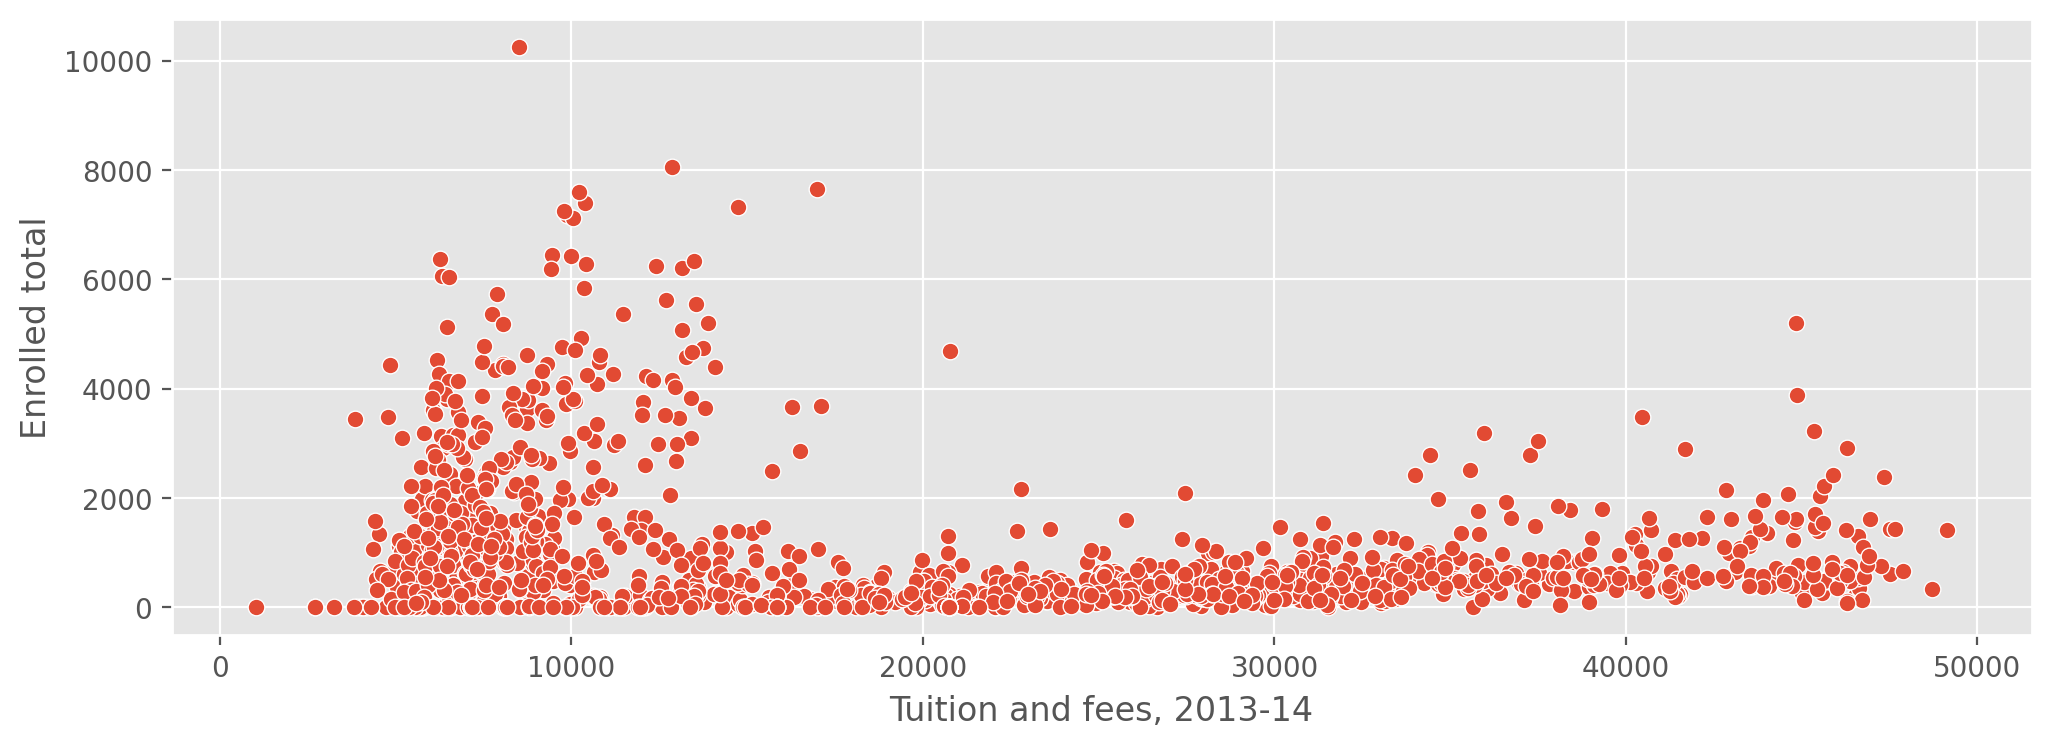

In [46]:
plt.figure(figsize = (12,4) ,dpi = 200)
sns.scatterplot('Tuition and fees, 2013-14','Enrolled total', data = data)

##### Do students prefer universities with low tuition and fees?


Yes, students prefer universities with low tuition and fees. (rate of enrolment is higher with lower tuition fees)

<AxesSubplot:xlabel='Total price for in-state students living on campus 2013-14', ylabel='Enrolled total'>

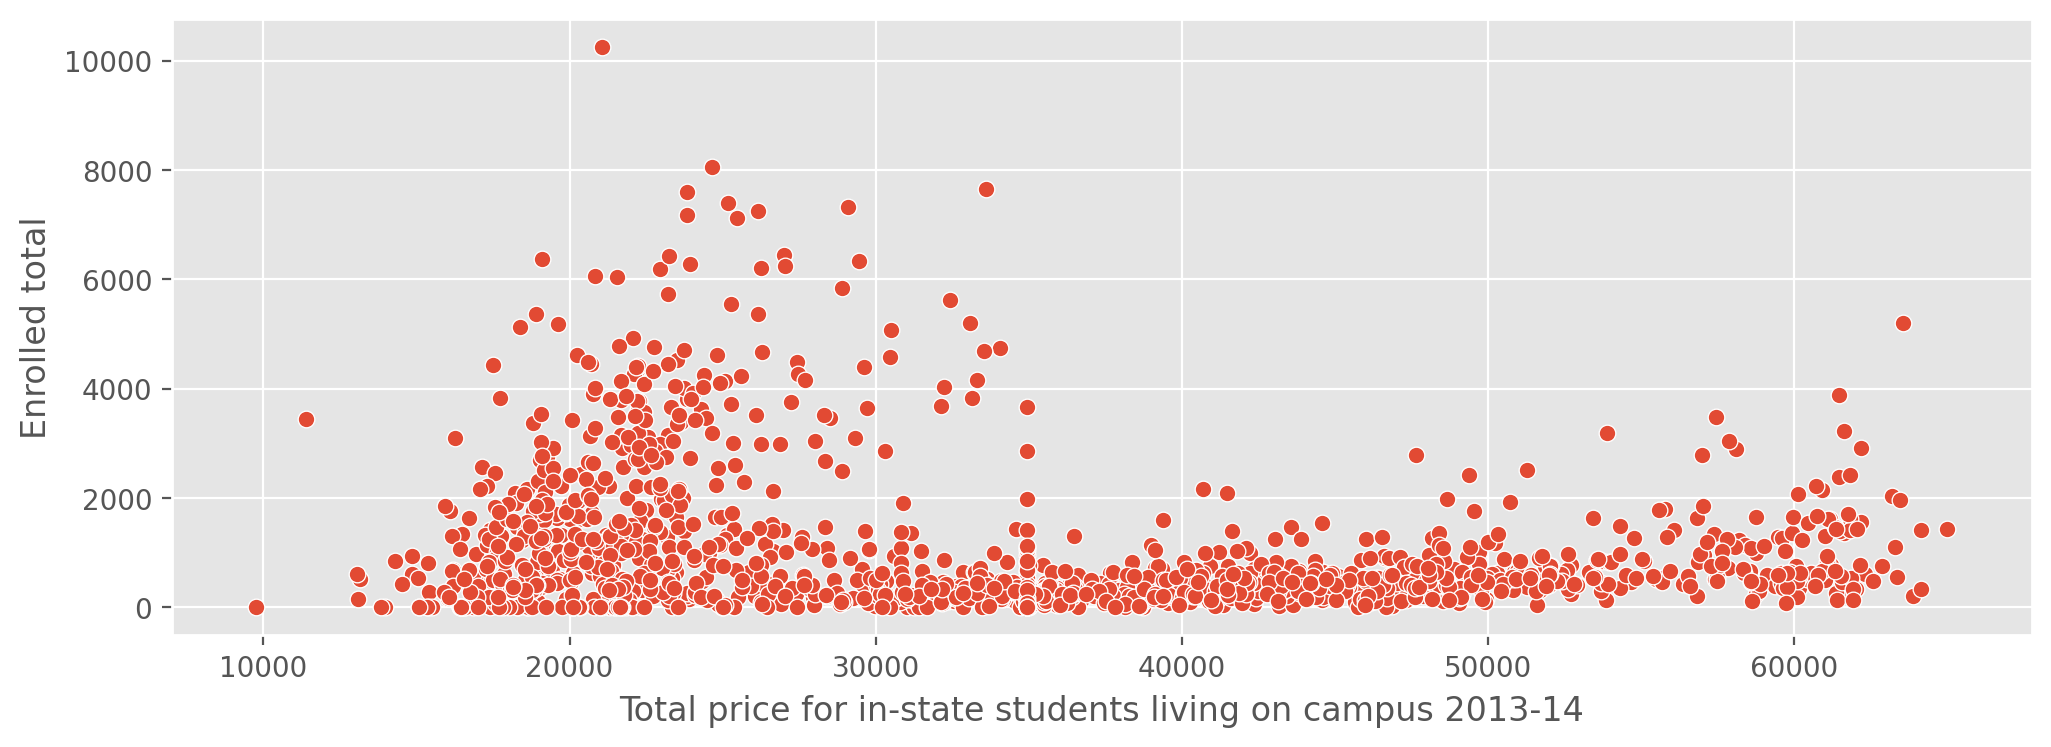

In [47]:
plt.figure(figsize = (12,4) ,dpi = 200)
sns.scatterplot('Total price for in-state students living on campus 2013-14','Enrolled total', data = data)

<AxesSubplot:xlabel='Total price for out-of-state students living on campus 2013-14', ylabel='Enrolled total'>

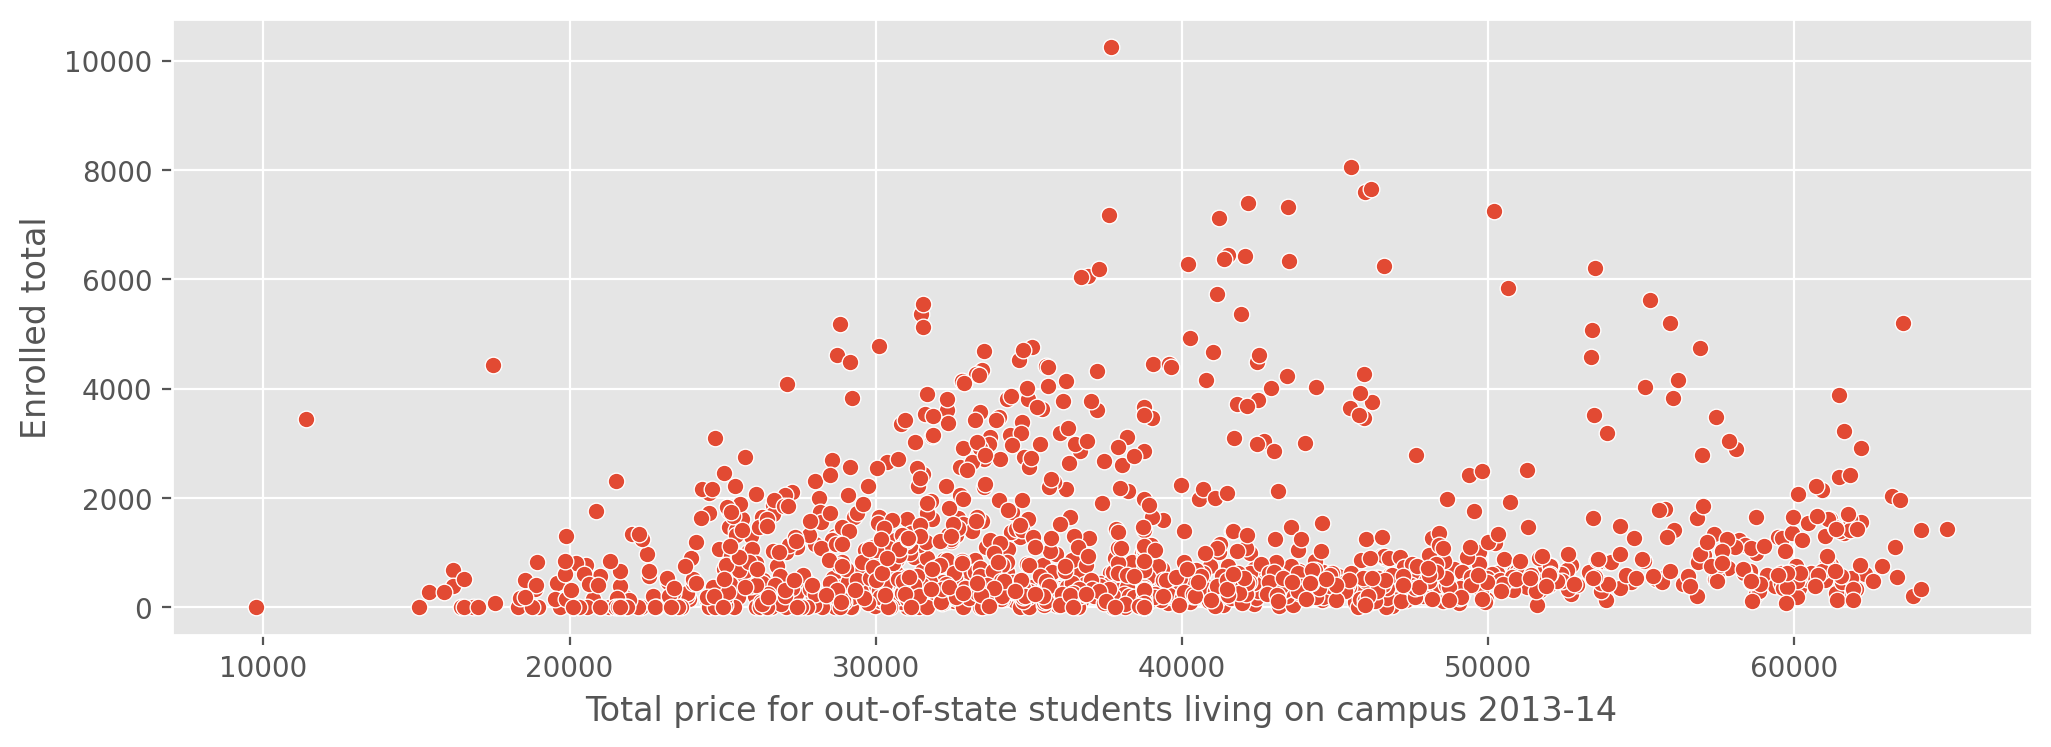

In [48]:
plt.figure(figsize = (12,4) ,dpi = 200)
sns.scatterplot('Total price for out-of-state students living on campus 2013-14','Enrolled total', data = data)

##### Do students prefer a university for its low on-campus cost of living?

Yes, students prefer a university for its low on-campus cost of living

In [54]:
population.head()

,state,population_2013
0,Alabama,4833722
1,Alaska,735132
2,Arizona,6626624
3,Arkansas,2959373
4,California,38332521


In [58]:
population.rename(columns = {'state':'State abbreviation'}, inplace = True)

In [59]:
population.head()

,State abbreviation,population_2013
0,Alabama,4833722
1,Alaska,735132
2,Arizona,6626624
3,Arkansas,2959373
4,California,38332521


In [60]:
df1 = pd.merge(data,population, on = 'State abbreviation') 

In [63]:
df1.head(50)

,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,Offers One but less than two years certificate,Offers Associate's degree,Offers Two but less than 4 years certificate,Offers Bachelor's degree,Offers Postbaccalaureate certificate,Offers Master's degree,Offers Post-master's certificate,Offers Doctor's degree - research/scholarship,Offers Doctor's degree - professional practice,Offers Doctor's degree - other,Offers Other degree,Applicants total,Admissions total,Enrolled total,Percent of freshmen submitting SAT scores,Percent of freshmen submitting ACT scores,SAT Critical Reading 25th percentile score,SAT Critical Reading 75th percentile score,SAT Math 25th percentile score,SAT Math 75th percentile score,SAT Writing 25th percentile score,SAT Writing 75th percentile score,ACT Composite 25th percentile score,ACT Composite 75th percentile score,"Estimated enrollment, total","Estimated enrollment, full time","Estimated enrollment, part time","Estimated undergraduate enrollment, total","Estimated undergraduate enrollment, full time","Estimated undergraduate enrollment, part time","Estimated freshman undergraduate enrollment, total","Estimated freshman enrollment, full time","Estimated freshman enrollment, part time","Estimated graduate enrollment, total","Estimated graduate enrollment, full time","Estimated graduate enrollment, part time",Associate's degrees awarded,Bachelor's degrees awarded,Master's degrees awarded,Doctor's degrese - research/scholarship awarded,Doctor's degrees - professional practice awarded,Doctor's degrees - other awarded,Certificates of less than 1-year awarded,Certificates of 1 but less than 2-years awarded,Certificates of 2 but less than 4-years awarded,Postbaccalaureate certificates awarded,Post-master's certificates awarded,Number of students receiving an Associate's degree,Number of students receiving a Bachelor's degree,Number of students receiving a Master's degree,Number of students receiving a Doctor's degree,Number of students receiving a certificate of less than 1-year,Number of students receiving a certificate of 1 but less than 4-years,Number of students receiving a Postbaccalaureate or Post-master's certificate,Percent admitted - total,Admissions yield - total,"Tuition and fees, 2010-11","Tuition and fees, 2011-12","Tuition and fees, 2012-13","Tuition and fees, 2013-14",Total price for in-state students living on campus 2013-14,Total price for out-of-state students living on campus 2013-14,State abbreviation,FIPS state code,Geographic region,Sector of institution,Level of institution,Control of institution,Historically Black College or University,Tribal college,Degree of urbanization (Urban-centric locale),Carnegie Classification 2010: Basic,Total enrollment,Full-time enrollment,Part-time enrollment,Undergraduate enrollment,Graduate enrollment,Full-time undergraduate enrollment,Part-time undergraduate enrollment,Percent of total enrollment that are American Indian or Alaska Native,Percent of total enrollment that are Asian,Percent of total enrollment that are Black or African American,Percent of total enrollment that are Hispanic/Latino,Percent of total enrollment that are Native Hawaiian or Other Pacific Islander,Percent of total enrollment that are White,Percent of total enrollment that are two or more races,Percent of total enrollment that are Race/ethnicity unknown,Percent of total enrollment that are Nonresident Alien,Percent of total enrollment that are Asian/Native Hawaiian/Pacific Islander,Percent of total enrollment that are women,Percent of undergraduate enrollment that are American Indian or Alaska Native,Percent of undergraduate enrollment that are Asian,Percent of undergraduate enrollment that are Black or African American,Percent of undergraduate enrollment that are Hispanic/Latino,Percent of undergraduate enrollment that are Native Hawaiian or Other Pac

<AxesSubplot:xlabel='population_2013', ylabel='Enrolled total'>

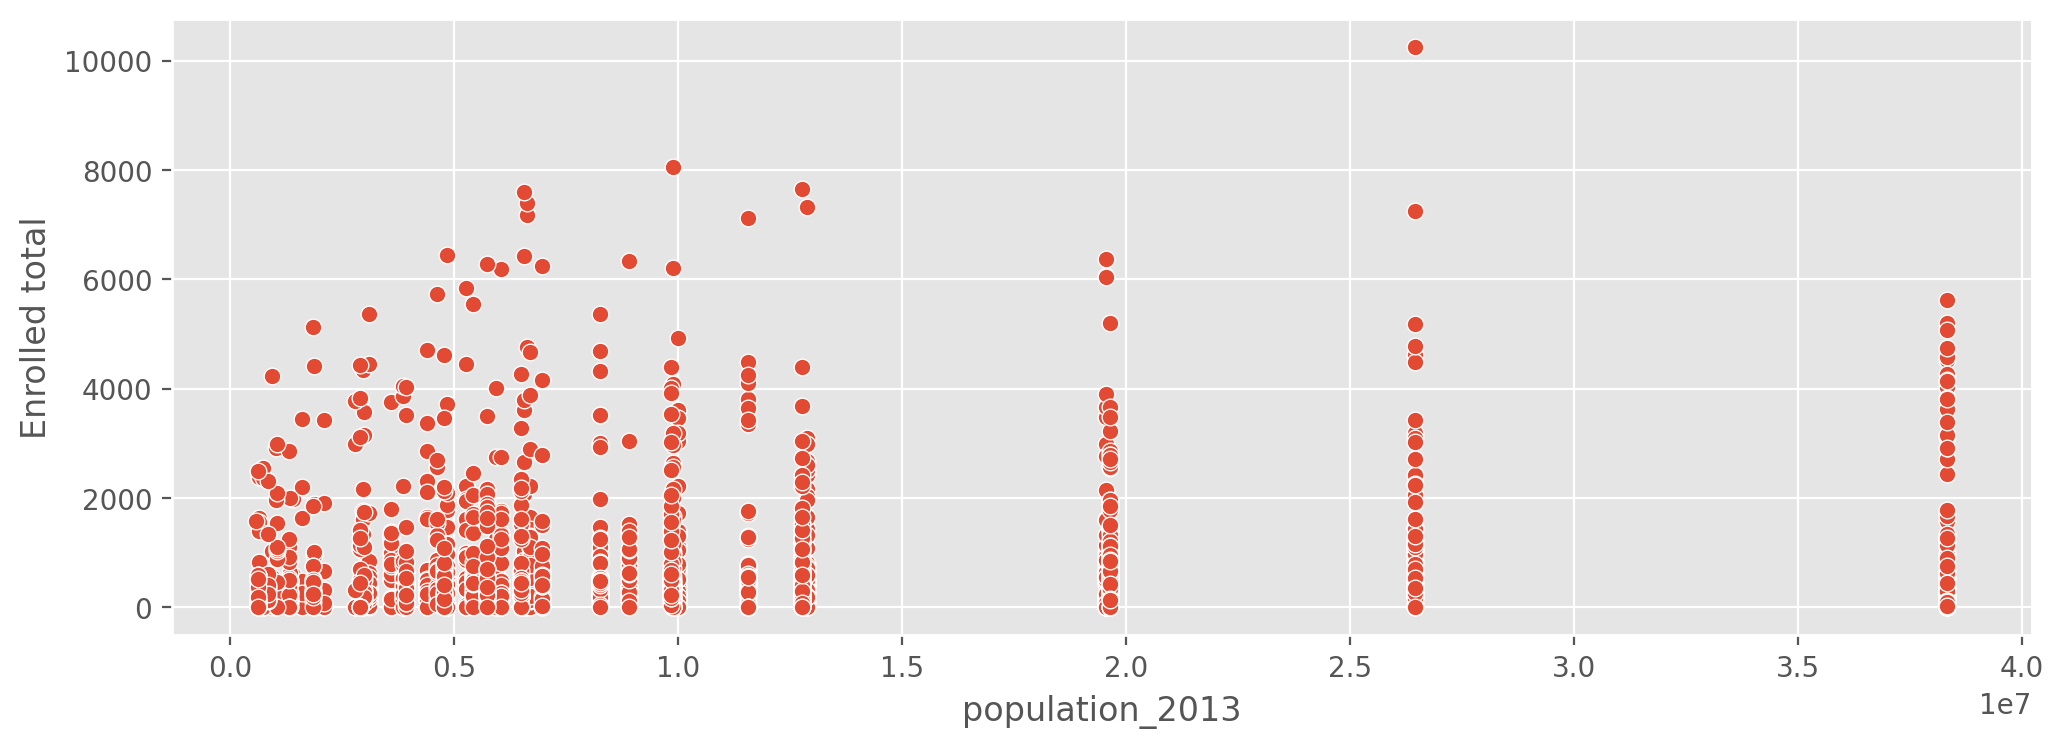

In [87]:
plt.figure(figsize = (12,4) ,dpi = 200)
sns.scatterplot('population_2013','Enrolled total', data = df1)

##### Do students prefer universities from highly populated states?

No, Enrollment rate of students is higher in less populated states.

In [88]:
gdp.head()

,code,state,gdp_million
0,1000,Alabama,191481.0
1,2000,Alaska,56622.8
2,4000,Arizona,275199.1
3,5000,Arkansas,114251.5
4,6000,California,2262771.2


In [89]:
gdp.rename(columns = {'state':'State abbreviation'}, inplace = True)

In [90]:
df2 = pd.merge(df1,gdp, on = 'State abbreviation') 

<AxesSubplot:xlabel='gdp_million', ylabel='Enrolled total'>

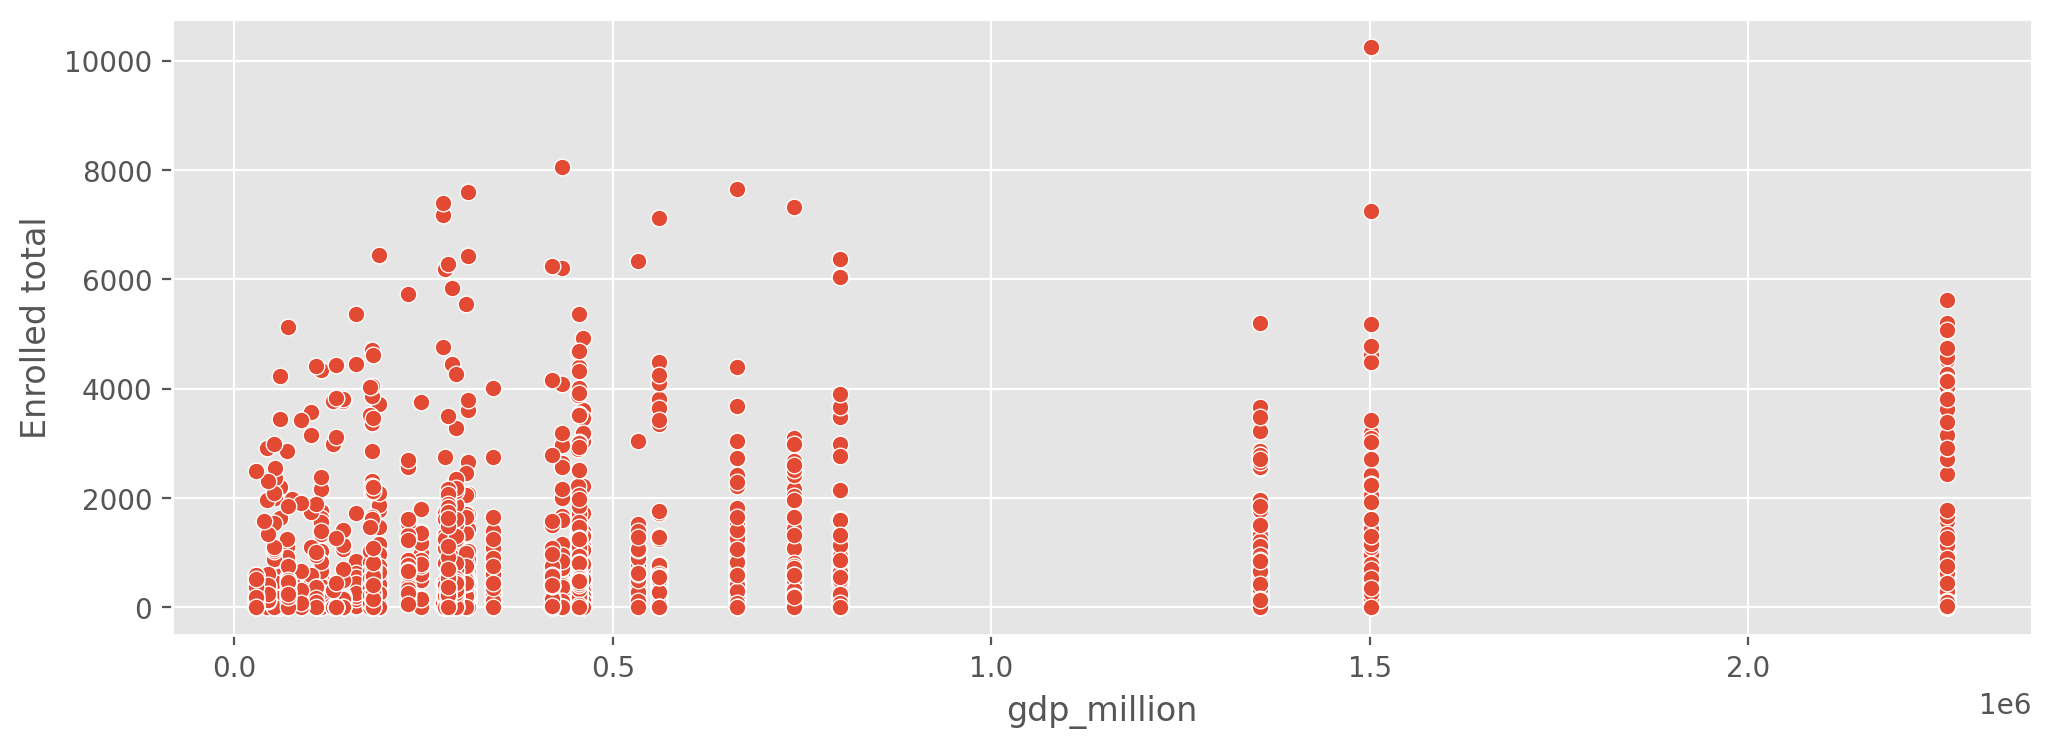

In [92]:
plt.figure(figsize = (12,4) ,dpi = 200)
sns.scatterplot('gdp_million','Enrolled total', data = df2)

##### Do students prefer a university because it belongs to a state with a high GDP per capita?

No, Enrollment rate of students is higher in states with low GDP per capita.

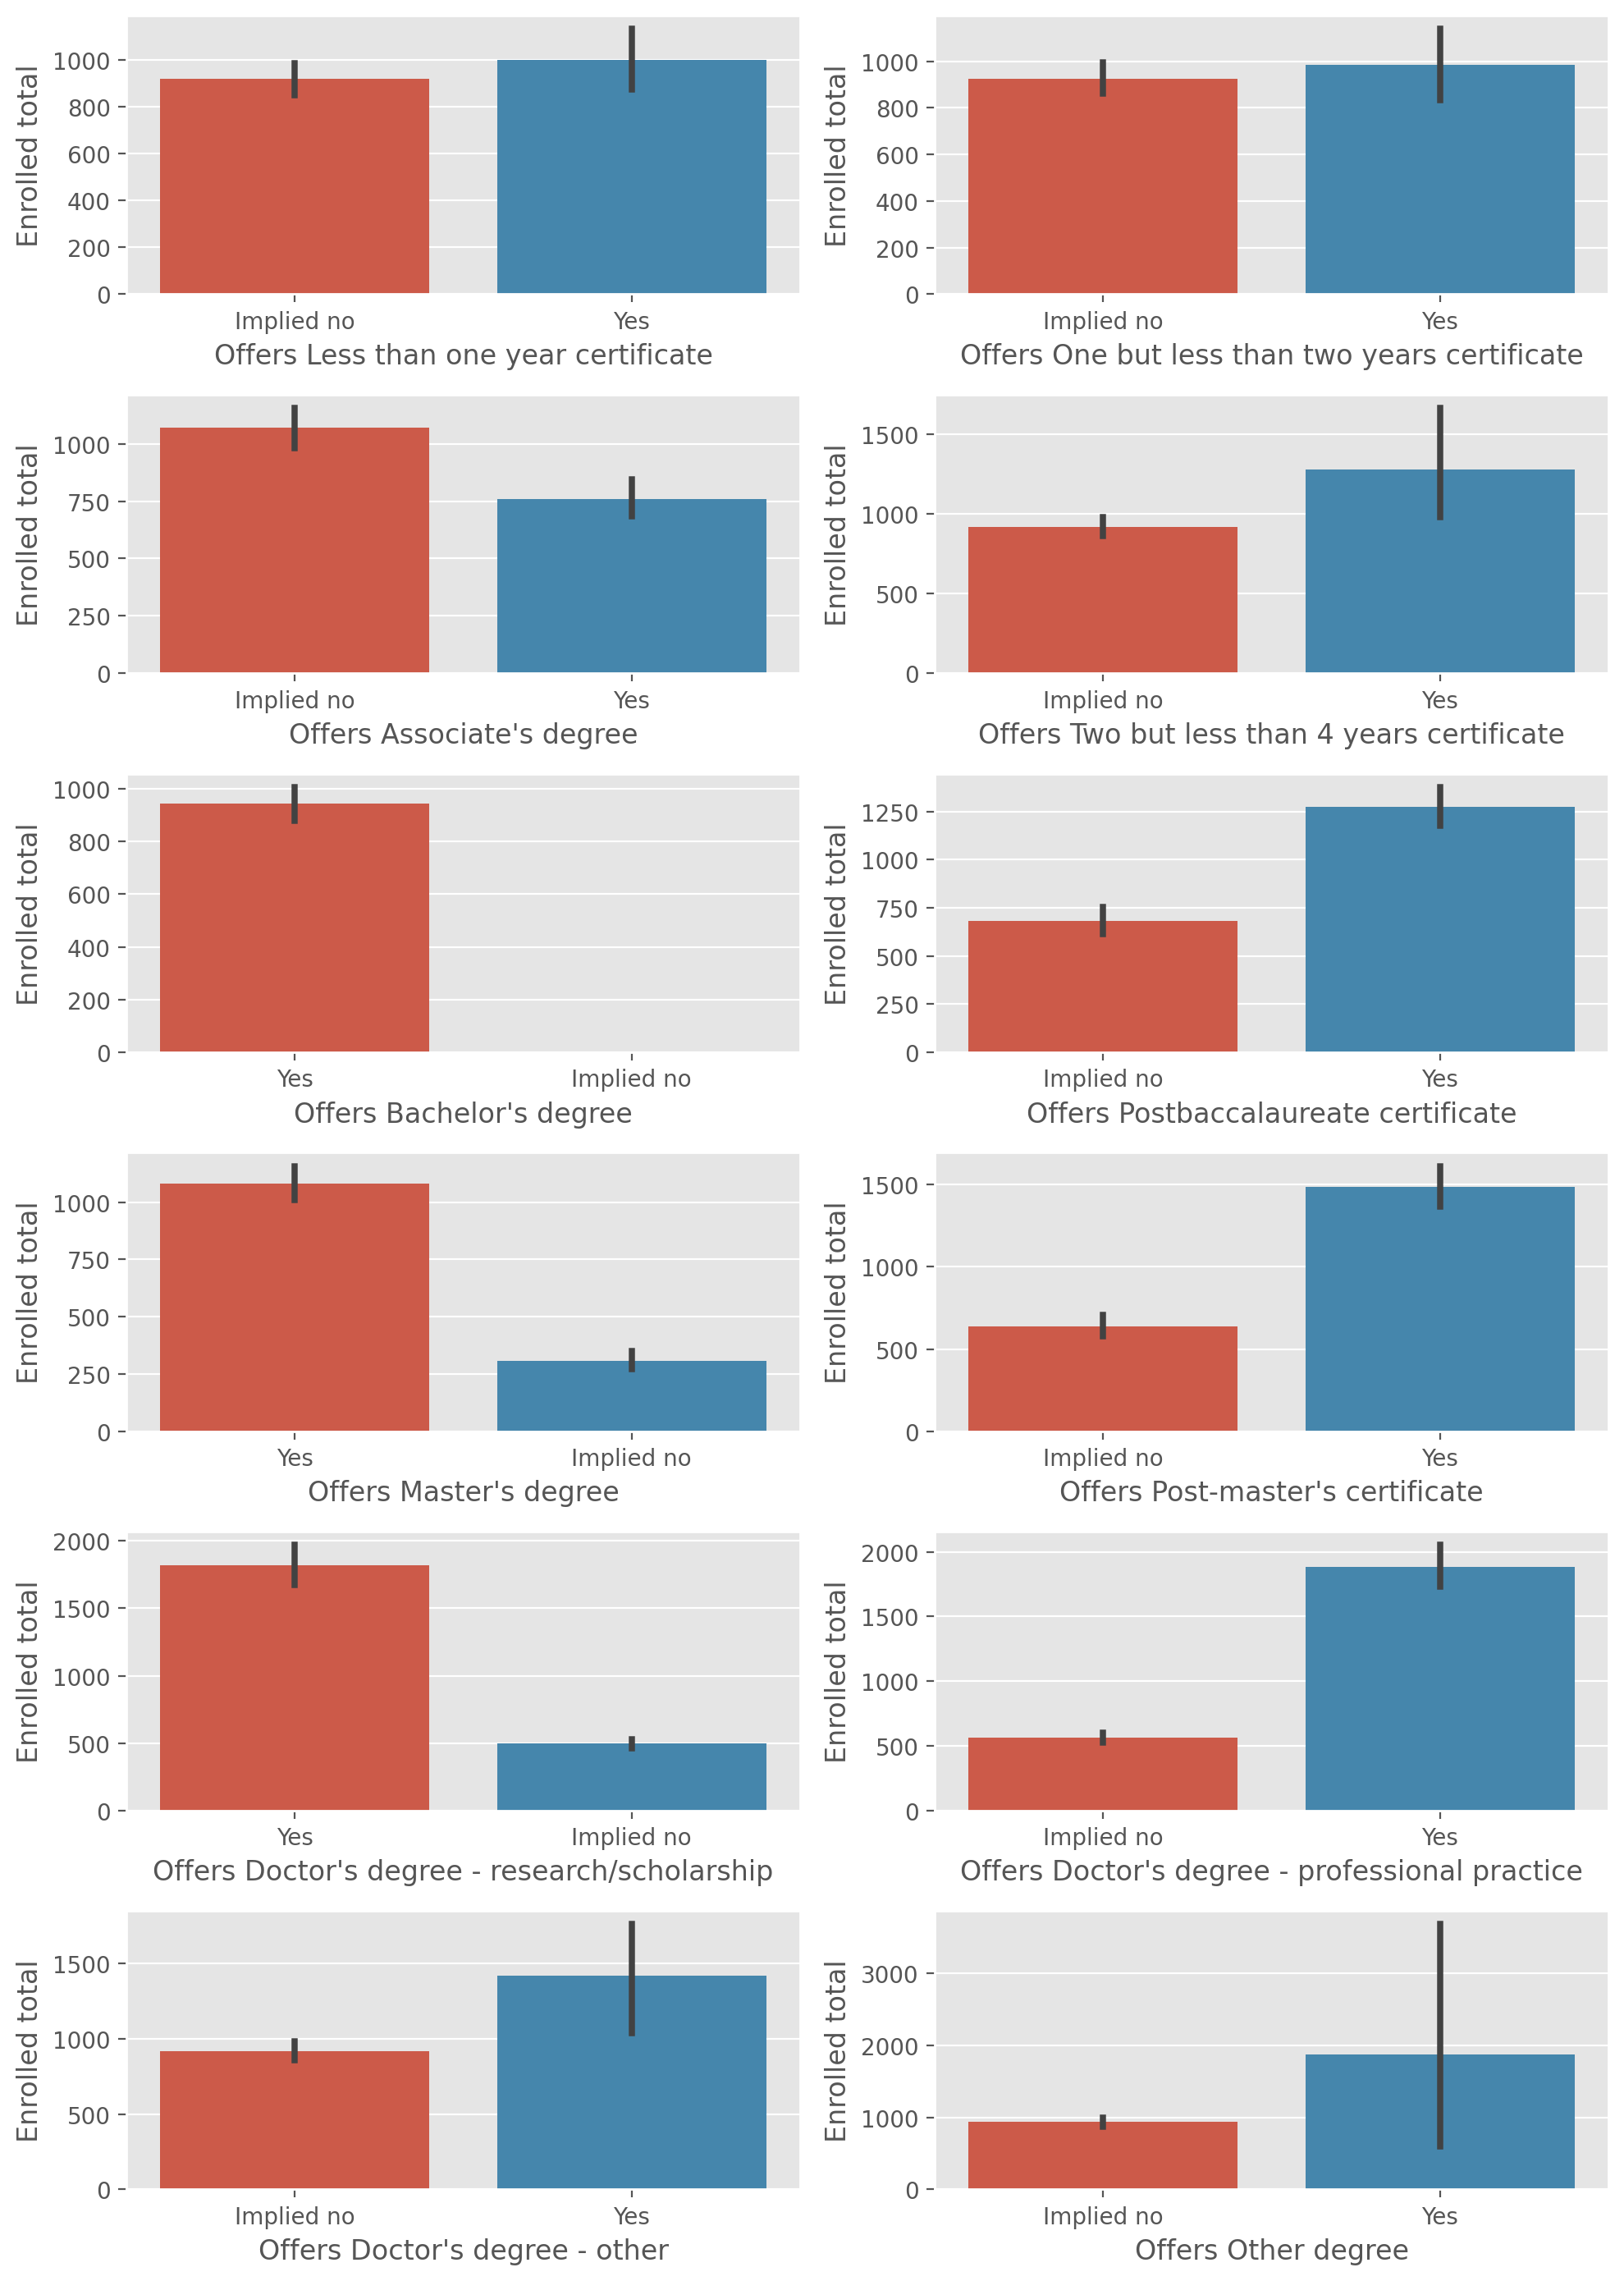

In [111]:
plt.figure(figsize = (10,14), dpi = 200)
plt.subplot(6,2,1)
sns.barplot('Offers Less than one year certificate','Enrolled total', data = df2)
plt.subplot(6,2,2)
sns.barplot('Offers One but less than two years certificate','Enrolled total', data = df2)
plt.subplot(6,2,3)
sns.barplot('''Offers Associate's degree''','Enrolled total', data = df2)
plt.subplot(6,2,4)
sns.barplot('Offers Two but less than 4 years certificate','Enrolled total', data = df2)
plt.subplot(6,2,5)
sns.barplot('''Offers Bachelor's degree''','Enrolled total', data = df2)
plt.subplot(6,2,6)
sns.barplot('Offers Postbaccalaureate certificate','Enrolled total', data = df2)
plt.subplot(6,2,7)
sns.barplot('''Offers Master's degree''','Enrolled total', data = df2)
plt.subplot(6,2,8)
sns.barplot('''Offers Post-master's certificate''','Enrolled total', data = df2)
plt.subplot(6,2,9)
sns.barplot('''Offers Doctor's degree - research/scholarship''','Enrolled total', data = df2)
plt.subplot(6,2,10)
sns.barplot('''Offers Doctor's degree - professional practice''','Enrolled total', data = df2)
plt.subplot(6,2,11)
sns.barplot('''Offers Doctor's degree - other''','Enrolled total', data = df2)
plt.subplot(6,2,12)
sns.barplot('Offers Other degree','Enrolled total', data = df2)
plt.tight_layout()

##### Do students prefer a university based on the possibility of a higher, additional academic degree in the same university?


Yes, Enrollment rate is higher for universities providing Postbaccalaureate certificate, Master's degree, Post-master's certificate, Doctor's degree - research/scholarship, Doctor's degree - professional practice Doctor's degree - other

# Summary

##### Do universities with a high number of applications are the preferred ones by students? in other words, could the number of applications tell us that a university is one of the most preferred by students?
No, high number of applications does not determine that the university is most preferred by students.
(universities with higher applications number, enrollment rate of students is almost steady)
#### Do students prefer universities that have a high rate of admission? in other words, do students prefer a university where it is easier for them to be admitted?
Yes, universities that have a high rate of admission student enrollment rate is high.
###### Do students prefer public or private universities?
Students prefer public universities as compared to private
##### Do students prefer universities with low tuition and fees?
Yes, students prefer universities with low tuition and fees. (rate of enrolment is higher with lower tuition fees)
##### Do students prefer a university for its low on-campus cost of living?
Yes, students prefer a university for its low on-campus cost of living
##### Do students prefer universities from highly populated states?
No, Enrollment rate of students is higher in less populated states.
##### Do students prefer a university because it belongs to a state with a high GDP per capita?
No, Enrollment rate of students is higher in states with low GDP per capita.
##### Do students prefer a university based on the possibility of a higher, additional academic degree in the same university?
Yes, Enrollment rate is higher for universities providing Postbaccalaureate certificate, Master's degree, Post-master's certificate, Doctor's degree - research/scholarship, Doctor's degree - professional practice Doctor's degree - other